In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("PT_INR_Prothrombin _Introduction _Test _Result_Dataset .csv")

In [3]:
dataset

,Patient ID,Age,Gender,PT Value,INR Value,Health Condition,Treatment Type,Risk Level
0,1,69,Male,18.355144,2.765927,Normal,Vitamin K,Low
1,2,32,Male,10.894440,2.480643,Normal,Anticoagulants,Low
2,3,89,Male,15.985299,2.662863,Normal,Vitamin K,Low
3,4,78,Male,18.171537,2.927404,Normal,Anticoagulants,Low
4,5,38,Female,13.652989,3.195382,Bleeding Disorder,Vitamin K,High
...,...,...,...,...,...,...,...,...
6995,6996,69,Female,16.801529,2.319676,Normal,NaN,Low
6996,6997,23,Male,23.064043,2.153335,Normal,NaN,Low
6997,6998,86,Female,16.917810,2.861205,Normal,Anticoagulants,Low
6998,6999,91,Male,16.872807,2.359891,Normal,Anticoagulants,Low


In [4]:
dataset = dataset.drop(columns=['Patient ID','Health Condition','Treatment Type'])

In [5]:
dataset

,Age,Gender,PT Value,INR Value,Risk Level
0,69,Male,18.355144,2.765927,Low
1,32,Male,10.894440,2.480643,Low
2,89,Male,15.985299,2.662863,Low
3,78,Male,18.171537,2.927404,Low
4,38,Female,13.652989,3.195382,High
...,...,...,...,...,...
6995,69,Female,16.801529,2.319676,Low
6996,23,Male,23.064043,2.153335,Low
6997,86,Female,16.917810,2.861205,Low
6998,91,Male,16.872807,2.359891,Low


In [6]:
# Perform one-hot encoding with drop_first=True
dataset= pd.get_dummies(dataset, drop_first=True)

In [7]:
# Convert specific columns from True/False to 0/1
columns = ['Gender_Male', 'Risk Level_Low', 'Risk Level_Moderate']
dataset[columns] = dataset[columns].astype(int)

In [8]:
dataset

,Age,PT Value,INR Value,Gender_Male,Risk Level_Low,Risk Level_Moderate
0,69,18.355144,2.765927,1,1,0
1,32,10.894440,2.480643,1,1,0
2,89,15.985299,2.662863,1,1,0
3,78,18.171537,2.927404,1,1,0
4,38,13.652989,3.195382,0,0,0
...,...,...,...,...,...,...
6995,69,16.801529,2.319676,0,1,0
6996,23,23.064043,2.153335,1,1,0
6997,86,16.917810,2.861205,0,1,0
6998,91,16.872807,2.359891,1,1,0


In [9]:
independent = dataset[['Age', 'PT Value', 'INR Value', 'Gender_Male']]
independent

,Age,PT Value,INR Value,Gender_Male
0,69,18.355144,2.765927,1
1,32,10.894440,2.480643,1
2,89,15.985299,2.662863,1
3,78,18.171537,2.927404,1
4,38,13.652989,3.195382,0
...,...,...,...,...
6995,69,16.801529,2.319676,0
6996,23,23.064043,2.153335,1
6997,86,16.917810,2.861205,0
6998,91,16.872807,2.359891,1


In [10]:
dependent = dataset[['Risk Level_Low']]
dependent

,Risk Level_Low
0,1
1,1
2,1
3,1
4,0
...,...
6995,1
6996,1
6997,1
6998,1


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [12]:
#to the procedure sklearn.tree as a folder import DecisionTreeRegressoris a file,regressor=DecisionTreeRegressor()is a class parameter.model as fit
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor=regressor.fit(x_train,y_train)

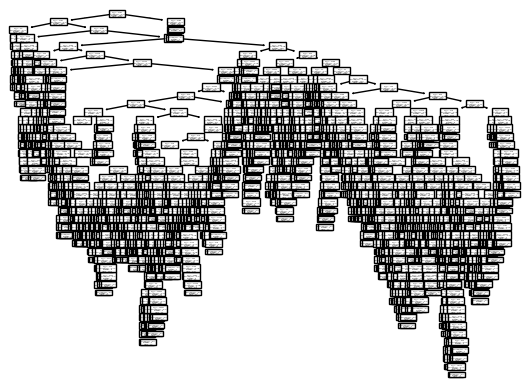

In [13]:
#import matplotlib.pyplot as plt(using draw a graph)
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()


In [14]:
y_pred=regressor.predict(x_test)

In [15]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

-0.36448802292071014

In [16]:
import pickle
filename="finalize_model_DecisionTree_INR_Prothrombin_sav"
pickle.dump(regressor,open(filename,"wb"))

In [17]:
loaded_model=pickle.load(open("finalize_model_DecisionTree_INR_Prothrombin_sav",'rb'))
result=loaded_model.predict([[69, 18.355144, 2.765927, 1]])

C:\Users\ragus\anaconda3\envs\AgriYieldAI\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [18]:
print("Predicted Risk Level: Low",result)

Predicted Risk Level: Low [1.]
